In [2]:
import statsmodels.api as sm #for OLS regression
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt #for heatmap plotting
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns #for heatmap plotting
from statsmodels.iolib.summary2 import summary_col #to summarize multiple regressions in one table
from datetime import date
from dateutil.relativedelta import relativedelta
import math
from scipy import stats

In [3]:
SP500 = pd.read_csv('C:/Users/yzou/Desktop/SP500.csv')

In [4]:
SP500['Date'] = pd.to_datetime(SP500['Date'])

In [5]:
SP500.index = SP500['Date']

In [56]:
Bull1 = ['1962-6-26', '1966-10-7']
Bear1 = ['1966-2-9', '1966-10-7']
Bull2 = ['1966-10-7', '1968-11-29']
Bear2 = ['1968-11-29', '1970-5-26']
Bull3 = ['1970-5-26', '1973-1-11']
Bear3 = ['1973-1-11', '1974-10-3']
Bull4 = ['1974-10-3', '1980-11-28']
Bear4 = ['1980-11-28', '1982-8-12']
Bull5 = ['1982-8-12', '1987-8-25']
Bear5 = ['1987-8-25', '1987-12-4']
Bull6 = ['1987-12-4', '2000-3-24']
Bear6 = ['2000-3-24', '2001-9-21']
Bull7 = ['2001-9-21', '2002-1-4']
Bear7 = ['2002-1-4', '2002-7-23']
Bull8 = ['2002-7-23', '2007-10-9']
Bear8 = ['2007-10-9', '2008-11-20']
Bull9 = ['2008-11-20', '2009-1-6']
Bear9 = ['2009-1-6', '2009-3-9']

us_crisis_1 = ['1973-10-19', '1975-2-28', 'OPEC Oil Embargo']
us_crisis_2 = ['1980-1-1', '1980-6-30', '1980 Recession']
us_crisis_3 = ['1981-7-1', '1982-11-1', '1981-1982 Recession']
us_crisis_4 = ['1990-7-1', '1991-3-30', 'Junk Bonk Crash/S&L Crisis']
us_crisis_5 = ['2001-3-10', '2001-11-1', 'dot-com bubble and 911 Attack']
us_crisis_6 = ['2007-8-1', '2009-7-1', '2008 Financial Crisis']
us_crisis_7 = ['2018-12-1', '2019-5-30', 'China-US Trade War']

other_crisis_1 = ['1997-9-1', '1998-6-30', 'Asia Crisis']
other_crisis_2 = ['1997-9-1', '1998-12-30', 'Russia Crisis']
# other_crisis_3 = ['2001-1-1','2001-12-30', 'Dotcom Bubble Burst']
other_crisis_4 = ['2010-1-1', '2012-6-30', 'European Debt Crisis']
other_crisis_5 = ['2015-6-12','2015-10-30', 'Chinese Market Crash']
other_crisis_6 = ['2015-1-1', '2015-12-30', 'Swiss Franc Shock']

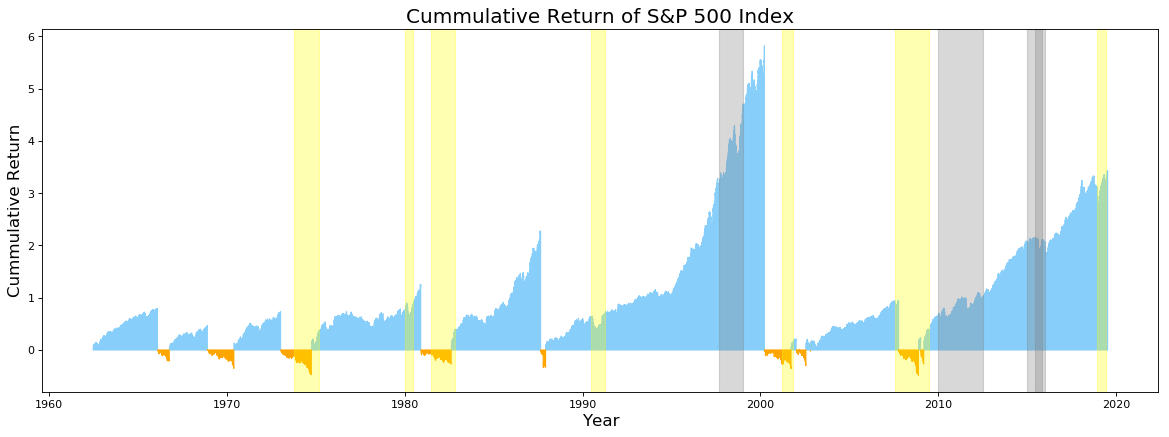

In [62]:
bull = SP500['% Change'].copy()
bear = SP500['% Change'].copy()

bull[bull <= 0] = np.nan
bear[bear > 0] = np.nan

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.stackplot(SP500.index, bull, color = 'lightskyblue', alpha=1)
plt.stackplot(SP500.index, bear, color = 'orange', alpha=1)

plt.xlabel('Year', size = 15)
plt.ylabel('Cummulative Return', size = 15)
plt.title('Cummulative Return of S&P 500 Index', size = 18)
plt.xticks(size = 10)
plt.axvspan(us_crisis_1[0], us_crisis_1[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_2[0], us_crisis_2[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_3[0], us_crisis_3[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_4[0], us_crisis_4[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_5[0], us_crisis_5[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_6[0], us_crisis_6[1], alpha=0.3, color='yellow')
plt.axvspan(us_crisis_7[0], us_crisis_7[1], alpha=0.3, color='yellow')

# plt.axvspan(other_crisis_1[0], other_crisis_1[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_2[0], other_crisis_2[1], alpha=0.3, color='Grey')
# plt.axvspan(other_crisis_3[0], other_crisis_3[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_4[0], other_crisis_4[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_5[0], other_crisis_5[1], alpha=0.3, color='Grey')
plt.axvspan(other_crisis_6[0], other_crisis_6[1], alpha=0.3, color='Grey')

# plt.axvspan(Bull1[0], Bull1[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull2[0], Bull2[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull3[0], Bull3[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull4[0], Bull4[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull5[0], Bull5[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull6[0], Bull6[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull7[0], Bull7[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull8[0], Bull8[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull9[0], Bull9[1], alpha=0.3, color='yellow')
# plt.axvspan(Bull10[0], Bull10[1], alpha=0.3, color='yellow')
# plt.axvspan(Bear1[0], Bear1[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear2[0], Bear2[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear3[0], Bear3[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear4[0], Bear4[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear5[0], Bear5[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear6[0], Bear6[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear7[0], Bear7[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear8[0], Bear8[1], alpha=0.3, color='Grey')
# plt.axvspan(Bear9[0], Bear9[1], alpha=0.3, color='Grey')

# plt.yticks(np.arange(-1, 700, step=100))
plt.savefig('Cummulative Return of S&P 500 Index.png')
plt.show()